In [20]:
import pandas as pd 
import numpy as np 
from ydata_profiling  import ProfileReport
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:

iter = pd.read_csv("penguins_lter.csv")


size = pd.read_csv("penguins_size.csv", names=[
    'Species',
    'Island',
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)',
    'Sex'
], dtype={
    'Culmen Length (mm)': "float64",
    'Culmen Depth (mm)' : "float64",   
    'Flipper Length (mm)' : "float64", 
    'Body Mass (g)' : "float64"
}, skiprows=1)


In [10]:
iter.isna().sum()

studyName              0
Sample Number          0
Species                0
Island                 0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [11]:
size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
iter["Culmen Length (mm)"] = iter["Culmen Length (mm)"].fillna(np.mean(iter["Culmen Length (mm)"]))
iter["Culmen Depth (mm)"] = iter["Culmen Depth (mm)"].fillna(np.mean(iter["Culmen Depth (mm)"]))
iter["Body Mass (g)"] = iter["Body Mass (g)"].fillna(np.mean(iter["Body Mass (g)"]))
iter["Flipper Length (mm)"] = iter["Flipper Length (mm)"].fillna(np.mean(iter["Flipper Length (mm)"]))
iter["Sex"] = iter["Sex"].fillna("MALE")

iter["Delta 13 C (o/oo)"].fillna(-25.6862915407855, inplace=True)
iter["Delta 15 N (o/oo)"].fillna(iter["Delta 15 N (o/oo)"].mean(), inplace= True)

size["Culmen Length (mm)"] = size["Culmen Length (mm)"].fillna(np.mean(size["Culmen Length (mm)"]))
size["Culmen Depth (mm)"] = size["Culmen Depth (mm)"].fillna(np.mean(size["Culmen Depth (mm)"]))
size["Body Mass (g)"] = size["Body Mass (g)"].fillna(np.mean(size["Body Mass (g)"]))
size["Flipper Length (mm)"] = size["Flipper Length (mm)"].fillna(np.mean(size["Flipper Length (mm)"]))
size["Sex"] = size["Sex"].fillna("MALE")

In [ ]:
size.isna().sum()

In [ ]:
a = list(size.columns)
b = list(iter.columns)

In [ ]:
size.to_csv("penguins_size.csv", index = False)

# Always Start form Here After Preprocessing CSV Data is save in the files


In [21]:
iter = pd.read_csv("penguins_lter.csv")
size = pd.read_csv("penguins_size.csv")
iter["Species"].replace({"Adelie Penguin (Pygoscelis adeliae)": "Adelie","Gentoo penguin (Pygoscelis papua)": "Gentoo","Chinstrap penguin (Pygoscelis antarctica)": "Chinstrap"}, inplace = True)

iter["Date Egg"] = pd.to_datetime(iter["Date Egg"], format = "%y/%d/%m")
iter["Dates"] = (iter['Date Egg'] - iter['Date Egg'].min()).dt.days

iter["studyName"].replace({
    "PAL0910": "Pal_1",
    "PAL0809": "Pal_2",
    "PAL0708": "Pal_3"
}, inplace= True)

In [ ]:
prof = ProfileReport(iter)
prof.to_file(output_file="iter.html")

prof2 = ProfileReport(size)
prof2.to_file(output_file="size.html")

In [13]:
iter.describe()

Sample Number                       Date Egg  Culmen Length (mm)  \
count     344.000000                            344          344.000000   
mean       63.151163  2011-08-31 10:36:16.744186112           43.921930   
min         1.000000            2011-07-09 00:00:00           32.100000   
25%        29.000000            2011-07-28 00:00:00           39.275000   
50%        58.000000            2011-08-10 12:00:00           44.250000   
75%        95.250000            2011-09-17 00:00:00           48.500000   
max       152.000000            2012-09-01 00:00:00           59.600000   
std        40.430199                            NaN            5.443643   

       Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
count         344.000000           344.000000     344.000000   
mean           17.151170           200.915205    4201.754386   
min            13.100000           172.000000    2700.000000   
25%            15.600000           190.000000    3550.000000   
50%            17.300000           197.000000    4050.000000   
75%            18.700000           213.000000    4750.000000   
max            21.500000           231.000000    6300.000000   
std             1.969027            14.020657     799.613058   

       Delta 15 N (o/oo)  Delta 13 C (o/oo)      Dates  
count         344.000000         344.000000  344.00000  
mean            8.733382         -25.686292   53.44186  
min             7.632200         -27.018540    0.00000  
25%             8.307415         -26.285460   19.00000  
50%             8.687455         -25.793660   32.50000  
75%             9.136170         -25.089467   70.00000  
max            10.025440         -23.787670  420.00000  
std             0.540392           0.778770   74.94645

In [14]:
iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            344 non-null    object        
 1   Sample Number        344 non-null    int64         
 2   Species              344 non-null    object        
 3   Island               344 non-null    object        
 4   Individual ID        344 non-null    object        
 5   Clutch Completion    344 non-null    object        
 6   Date Egg             344 non-null    datetime64[ns]
 7   Culmen Length (mm)   344 non-null    float64       
 8   Culmen Depth (mm)    344 non-null    float64       
 9   Flipper Length (mm)  344 non-null    float64       
 10  Body Mass (g)        344 non-null    float64       
 11  Sex                  344 non-null    object        
 12  Delta 15 N (o/oo)    344 non-null    float64       
 13  Delta 13 C (o/oo)    344 non-null  

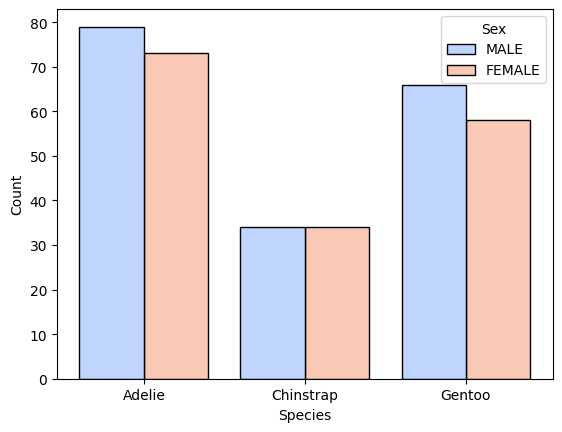

In [31]:
sns.histplot(data = iter, x = "Species", hue = "Sex", multiple="dodge", shrink=0.8, palette="coolwarm")
plt.show()

We can see that Male are more or equal to Female in number

Chinstrap being the lowest in the total population

In [40]:
iter[(iter["Sex"] == "MALE") & (iter["Species"] == "Adelie")]["Body Mass (g)"].mean()

4013.6298023539866

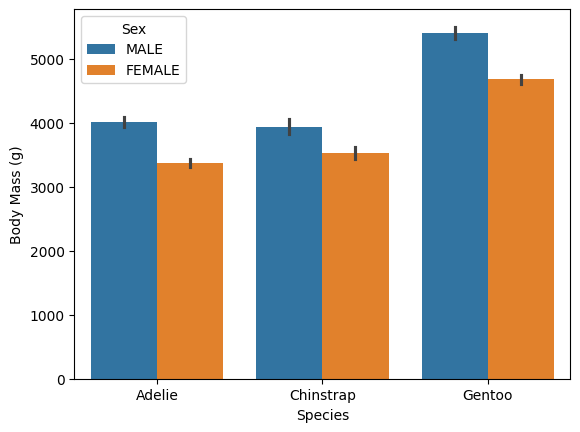

In [16]:
sns.barplot(data = iter, x = "Species",y = "Body Mass (g)", hue = "Sex")
plt.show()

<Axes: xlabel='Species', ylabel='Body Mass (g)'>

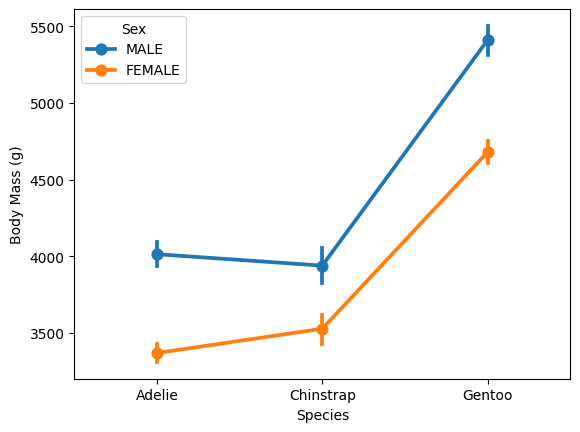

In [18]:
sns.pointplot(data = iter, x = "Species", y = "Body Mass (g)", hue = "Sex")

Generally Males are Heavier than the Females, But in the Gentoo species penguins, their females are even heavier than the Males of other species.

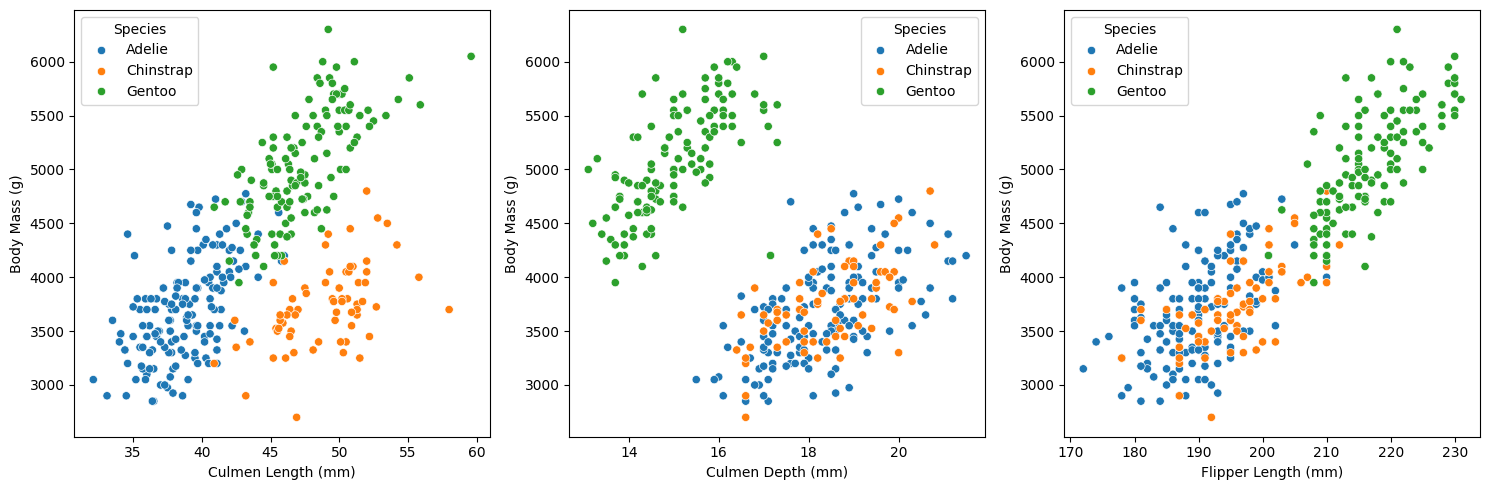

In [19]:
fig, axes = plt.subplots( 1,3, figsize=(15, 5))  

for i, col in enumerate(["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]):
    sns.scatterplot(ax=axes[i], x=iter[col], y=iter["Body Mass (g)"], hue= iter["Species"])


plt.tight_layout()

# Show the plots
plt.show()

**Culmen -> It is the Beak part area of the Penguin**

In the abvove three graphs we can see that the 

(Gentoo Penguin are the heaviest among the three species)\n

Culmen Length VS Body Mass -> It is clustered according to the three species \n

Culmen Depth VS Body Mass -> It is inversly correlated\n

Flipper Length VS Body mass -> Directly correlated\n

*In both the above two graphs Gentoo species are clustered seprated from the other two while the other two species are mixed.

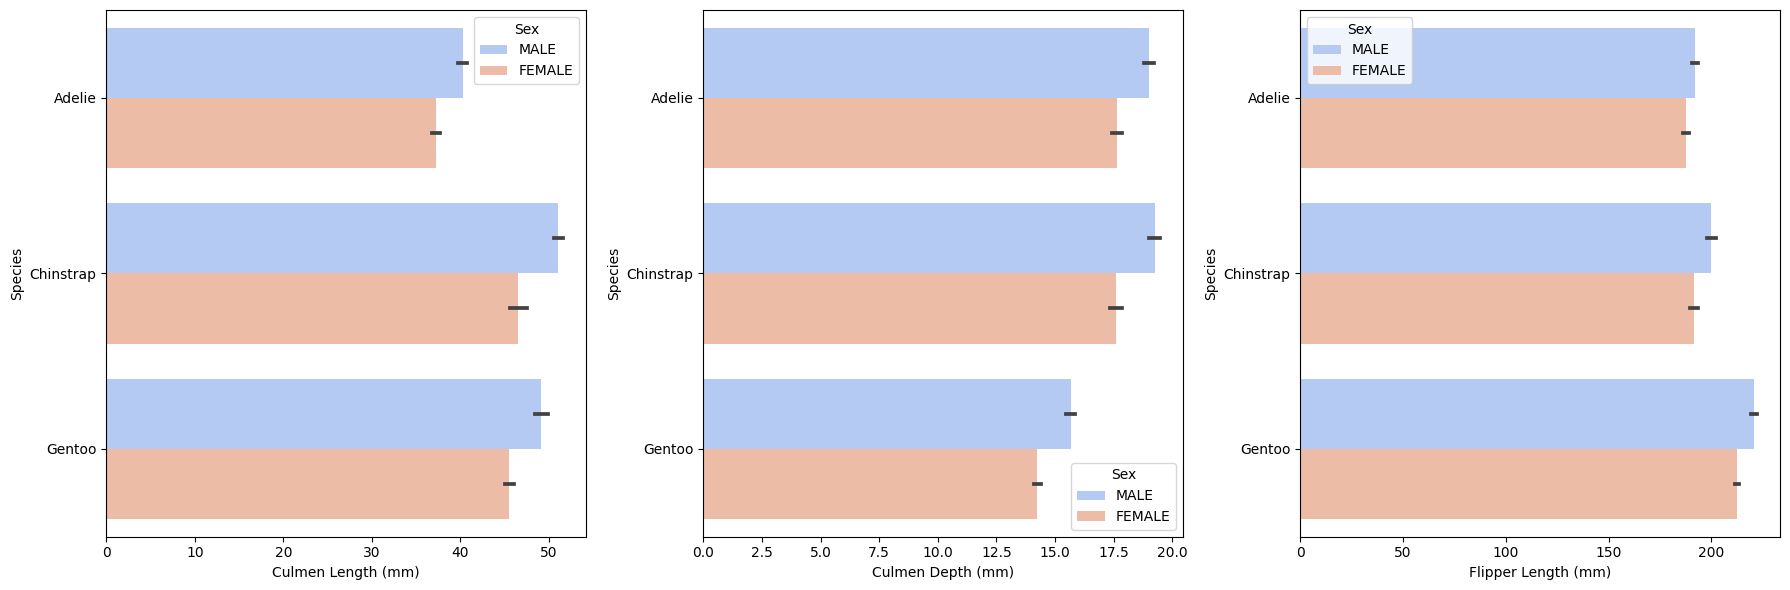

In [57]:
fig, axes = plt.subplots( 1,3, figsize=(18, 6))  

for i, col in enumerate(["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]):
    sns.barplot(ax=axes[i], x=iter[col], y=iter["Species"], hue= iter["Sex"], palette = "coolwarm")


plt.tight_layout()

# Show the plots
plt.show()

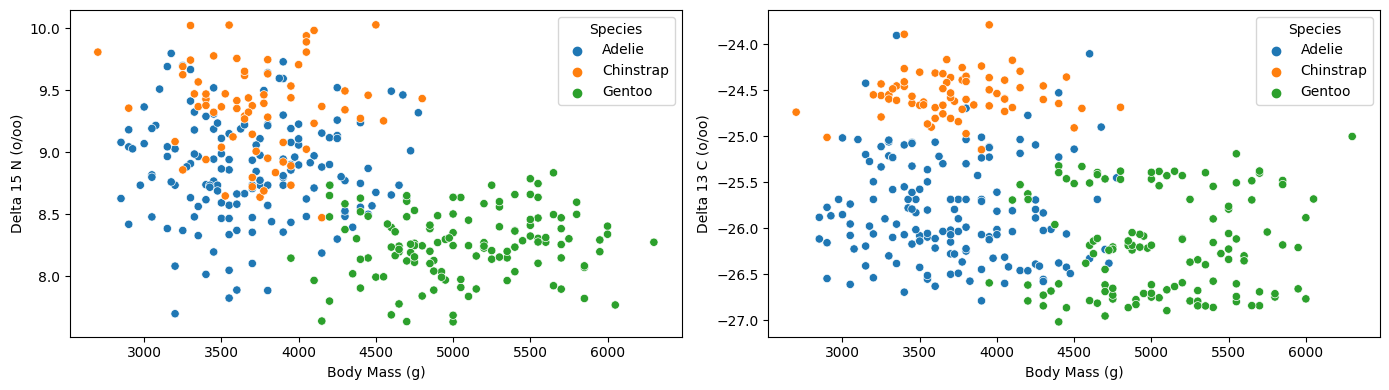

In [69]:

fig, axis = plt.subplots(1, 2, figsize = (14,4))

sns.scatterplot(ax = axis[0],  x = iter["Body Mass (g)"], y = iter["Delta 15 N (o/oo)"], hue = iter["Species"])
sns.scatterplot(ax = axis[1],  x = iter["Body Mass (g)"], y = iter["Delta 13 C (o/oo)"], hue = iter["Species"])

plt.tight_layout()
plt.show()


δ15N (Nitrogen-15) – "What Penguins Eat"

    * The higher the δ15N value, the higher up the food chain the penguin is eating.
    * Example: A penguin that eats fish and squid will have a higher δ15N than one that eats mostly krill.

δ13C (Carbon-13) – "Where Penguins Eat"

    * The δ13C value tells us where the penguin is getting its food:
    * Higher values → Near the coast or in areas with more sea ice.
    * Lower values → Farther out in the open ocean. (Negative Values)

*In simple terms, the penguins with a -27 value are likely eating mostly krill, fish, zooplankton, while those with a -23.5 value may mixed fish and possibly seabirds or squid, potentially including both marine and land-based sources.*

1. For the Delta 15 N VS Body Mass -> A normal observation wil be that since (Gentoo) have greater body mass they will be needed to eat more than the other two, But it is strange that they have less Delta 15 N value????

2. For the Delta 13 C VS Body Mass -> The lighter Penguins (CHinstrap) species tends to not go much further for food, because their  requirement is fullfiled as they have less diet.

3. Comining Delta 15 and Delta 13-> We can conclude that the Delta 13 C values (-24‰ to -27‰) indicate an open ocean habitat and Delta 15 N values (7.5 - 10 ) indicates a diet heavy in krill, which means penguins are foraging in parts of the open ocean where krill swarms are present.


So, the Chinstrap Penguins are heaving Diet of birds, squids and other fishes and They are also up in the food chain.


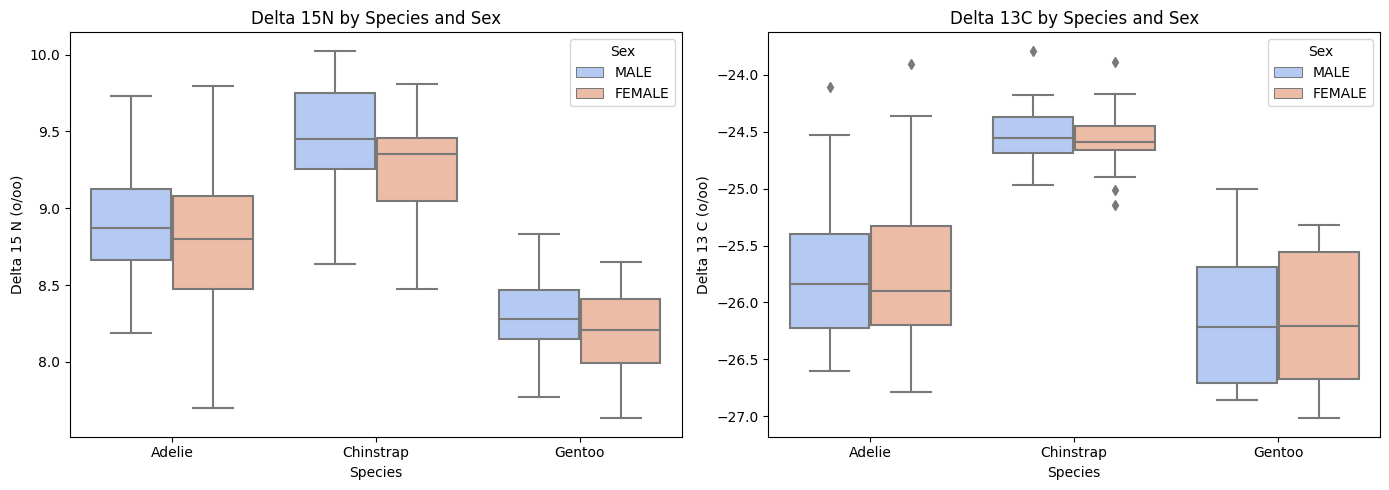

In [75]:


fig, axis = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    ax=axis[0], 
    x=iter["Species"], 
    y=iter["Delta 15 N (o/oo)"], 
    hue=iter["Sex"],  # Separate male & female within each species
    palette="coolwarm"
)
axis[0].set_title("Delta 15N by Species and Sex")

sns.boxplot(
    ax=axis[1], 
    x=iter["Species"], 
    y=iter["Delta 13 C (o/oo)"], 
    hue=iter["Sex"], 
    palette="coolwarm"
)
axis[1].set_title("Delta 13C by Species and Sex")

plt.tight_layout()
plt.show()


Delta 15 N

* Adelie species has he most widespread range, data is not concentrated around the median.(Intersting to see the Females of Adelie species)
* The other two species have concentrated spread around the median as compoarede to Adelie species, even among them the Gentoo Species are not ont top of Food chain than the other two.

Delta 13 C

* This Delata 13 C has some outliers, aside from that The Adelie and Gentoo species are more on a diet of ocean based like Krills or fish while the Chinstrap are both marine animals and possibly some land-based or higher trophic level prey (like other birds or fish that feed on C4 plants)
* Both Male and Female show nearly same pattern.

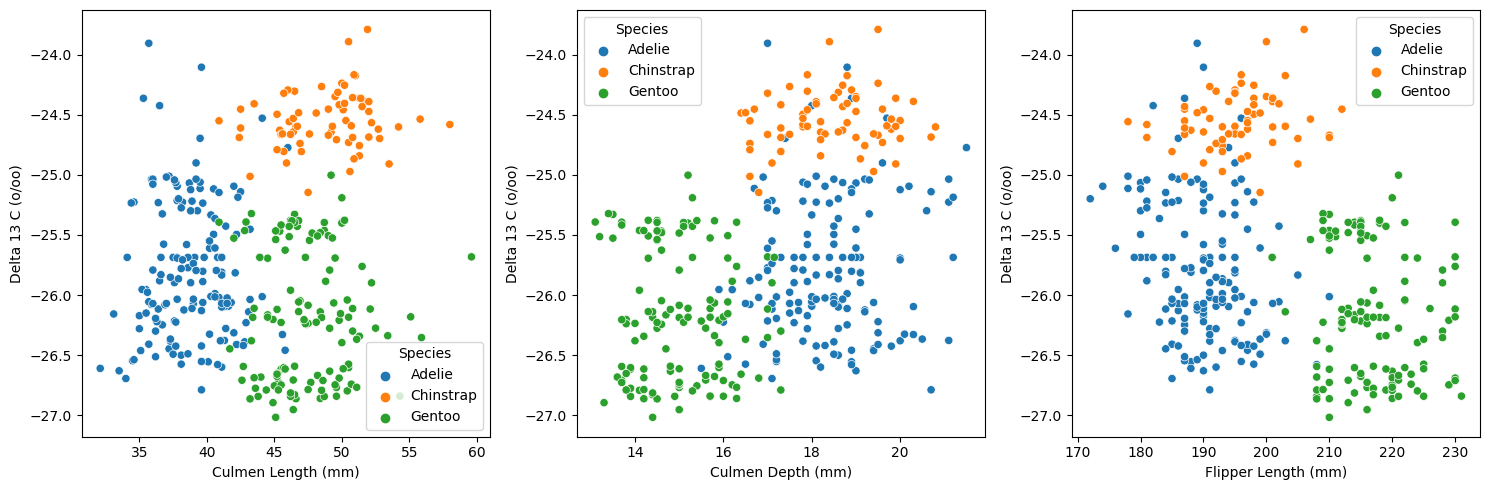

In [6]:
fig, axes = plt.subplots( 1,3, figsize=(15, 5))  

for i, col in enumerate(["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]):
    sns.scatterplot(ax=axes[i], x=iter[col], y=iter["Delta 13 C (o/oo)"], hue= iter["Species"])


plt.tight_layout()

# Show the plots
plt.show()

Since Delta 13 C mainly deals with how far are Penguins going for their Food and what they are eating.

The Chinstrap having a good diet require much greater feature to help them get their food, Hence they have Longer Culmen Length, Culmen Depth and which supports them.

Krill (which are rich in Lipids or fat deposits) are fed by Gentoo species and Krills are mostly present in Ocean, which supports why Gentoo Species have high Body Mass and Largest Flipper Length (they have to be great swimmers).

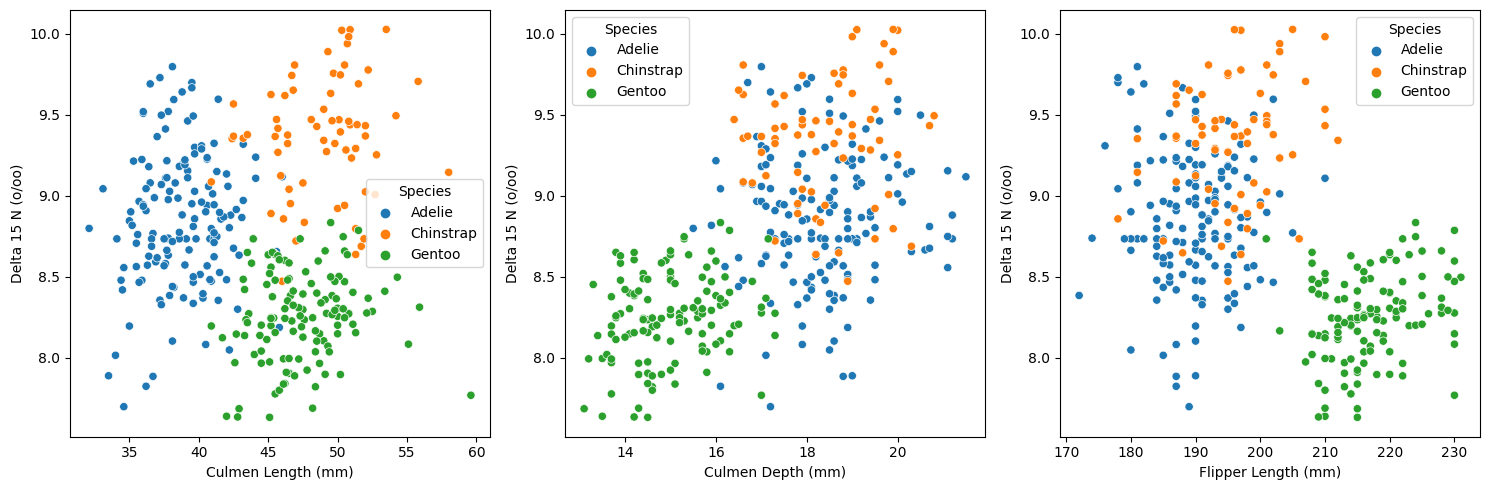

In [10]:
fig, axes = plt.subplots( 1,3, figsize=(15, 5))  

for i, col in enumerate(["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"]):
    sns.scatterplot(ax=axes[i], x=iter[col], y=iter["Delta 15 N (o/oo)"], hue= iter["Species"])


plt.tight_layout()

# Show the plots
plt.show()

The data simply shows that the Adelie and Chinstrap Species are above in Food Chain (they are more aggresive in their food habbits) while the Gentoo Species are not that agressive. 

Their Culemen Lenght and Depth and Flipper Length supports the observation.

In [85]:
test = iter[["Dates", "Species"]]
d = {}
for i in set(test["Species"]):
    l = list(test[test["Species"] == i]["Dates"].describe())

    d[f"{i}"] = [l[3],l[4],l[5],l[6],l[7]]

d

{'Adelie': [0.0, 7.0, 31.5, 68.0, 76.0],
 'Gentoo': [9.0, 24.0, 31.0, 73.0, 420.0],
 'Chinstrap': [10.0, 19.0, 46.0, 74.0, 360.0]}

In [ ]:
l = []
for i in set(iter["Species"].value_counts()):
    

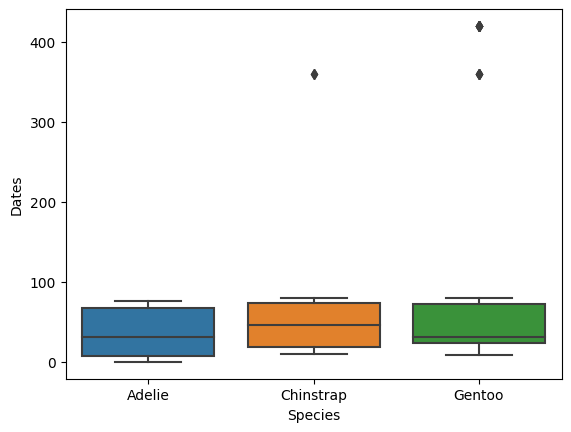

In [55]:
sns.boxplot(data = iter, y = "Dates", x = "Species")
plt.show()

The above graph shows that all three species give birth to eggs within 100 days and altogether. Except for 2-3 outliers.

In [86]:
pd.crosstab(iter["Species"], iter["Island"])

Island     Biscoe  Dream  Torgersen
Species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0

<Axes: xlabel='Island', ylabel='Species'>

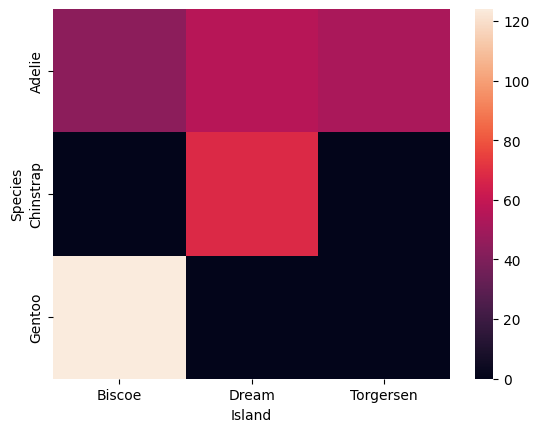

In [58]:
sns.heatmap(pd.crosstab(iter["Species"], iter["Island"]))

* Adielie Speciec are evenly spread across all the islands.
* Chinstrap is endemic to Dream island, while the Gentoo Species are endemic to Biscoe island

In [60]:
pd.crosstab(iter["Species"], iter["Island"])

Island     Biscoe  Dream  Torgersen
Species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0

In [52]:
pd.crosstab(iter["Clutch Completion"], iter["Species"], normalize='columns')

Species              Adelie  Chinstrap    Gentoo
Clutch Completion                               
No                 0.092105   0.205882  0.064516
Yes                0.907895   0.794118  0.935484

In [53]:
pd.crosstab(iter["Clutch Completion"], iter["Island"], normalize='columns')

Island               Biscoe     Dream  Torgersen
Clutch Completion                               
No                 0.059524  0.145161   0.153846
Yes                0.940476  0.854839   0.846154

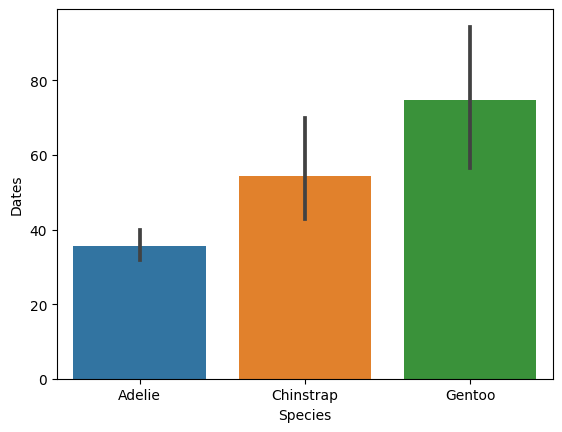

In [62]:
sns.barplot(data = iter, x = "Species", y =  "Dates")
plt.show()

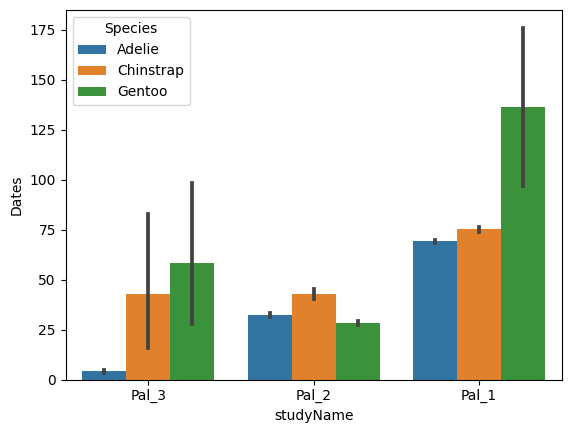

In [67]:
sns.barplot(data = iter, x = "studyName", y = "Dates", hue = "Species")
plt.show()

Gentoo Species have laid the most eggs among all three species.

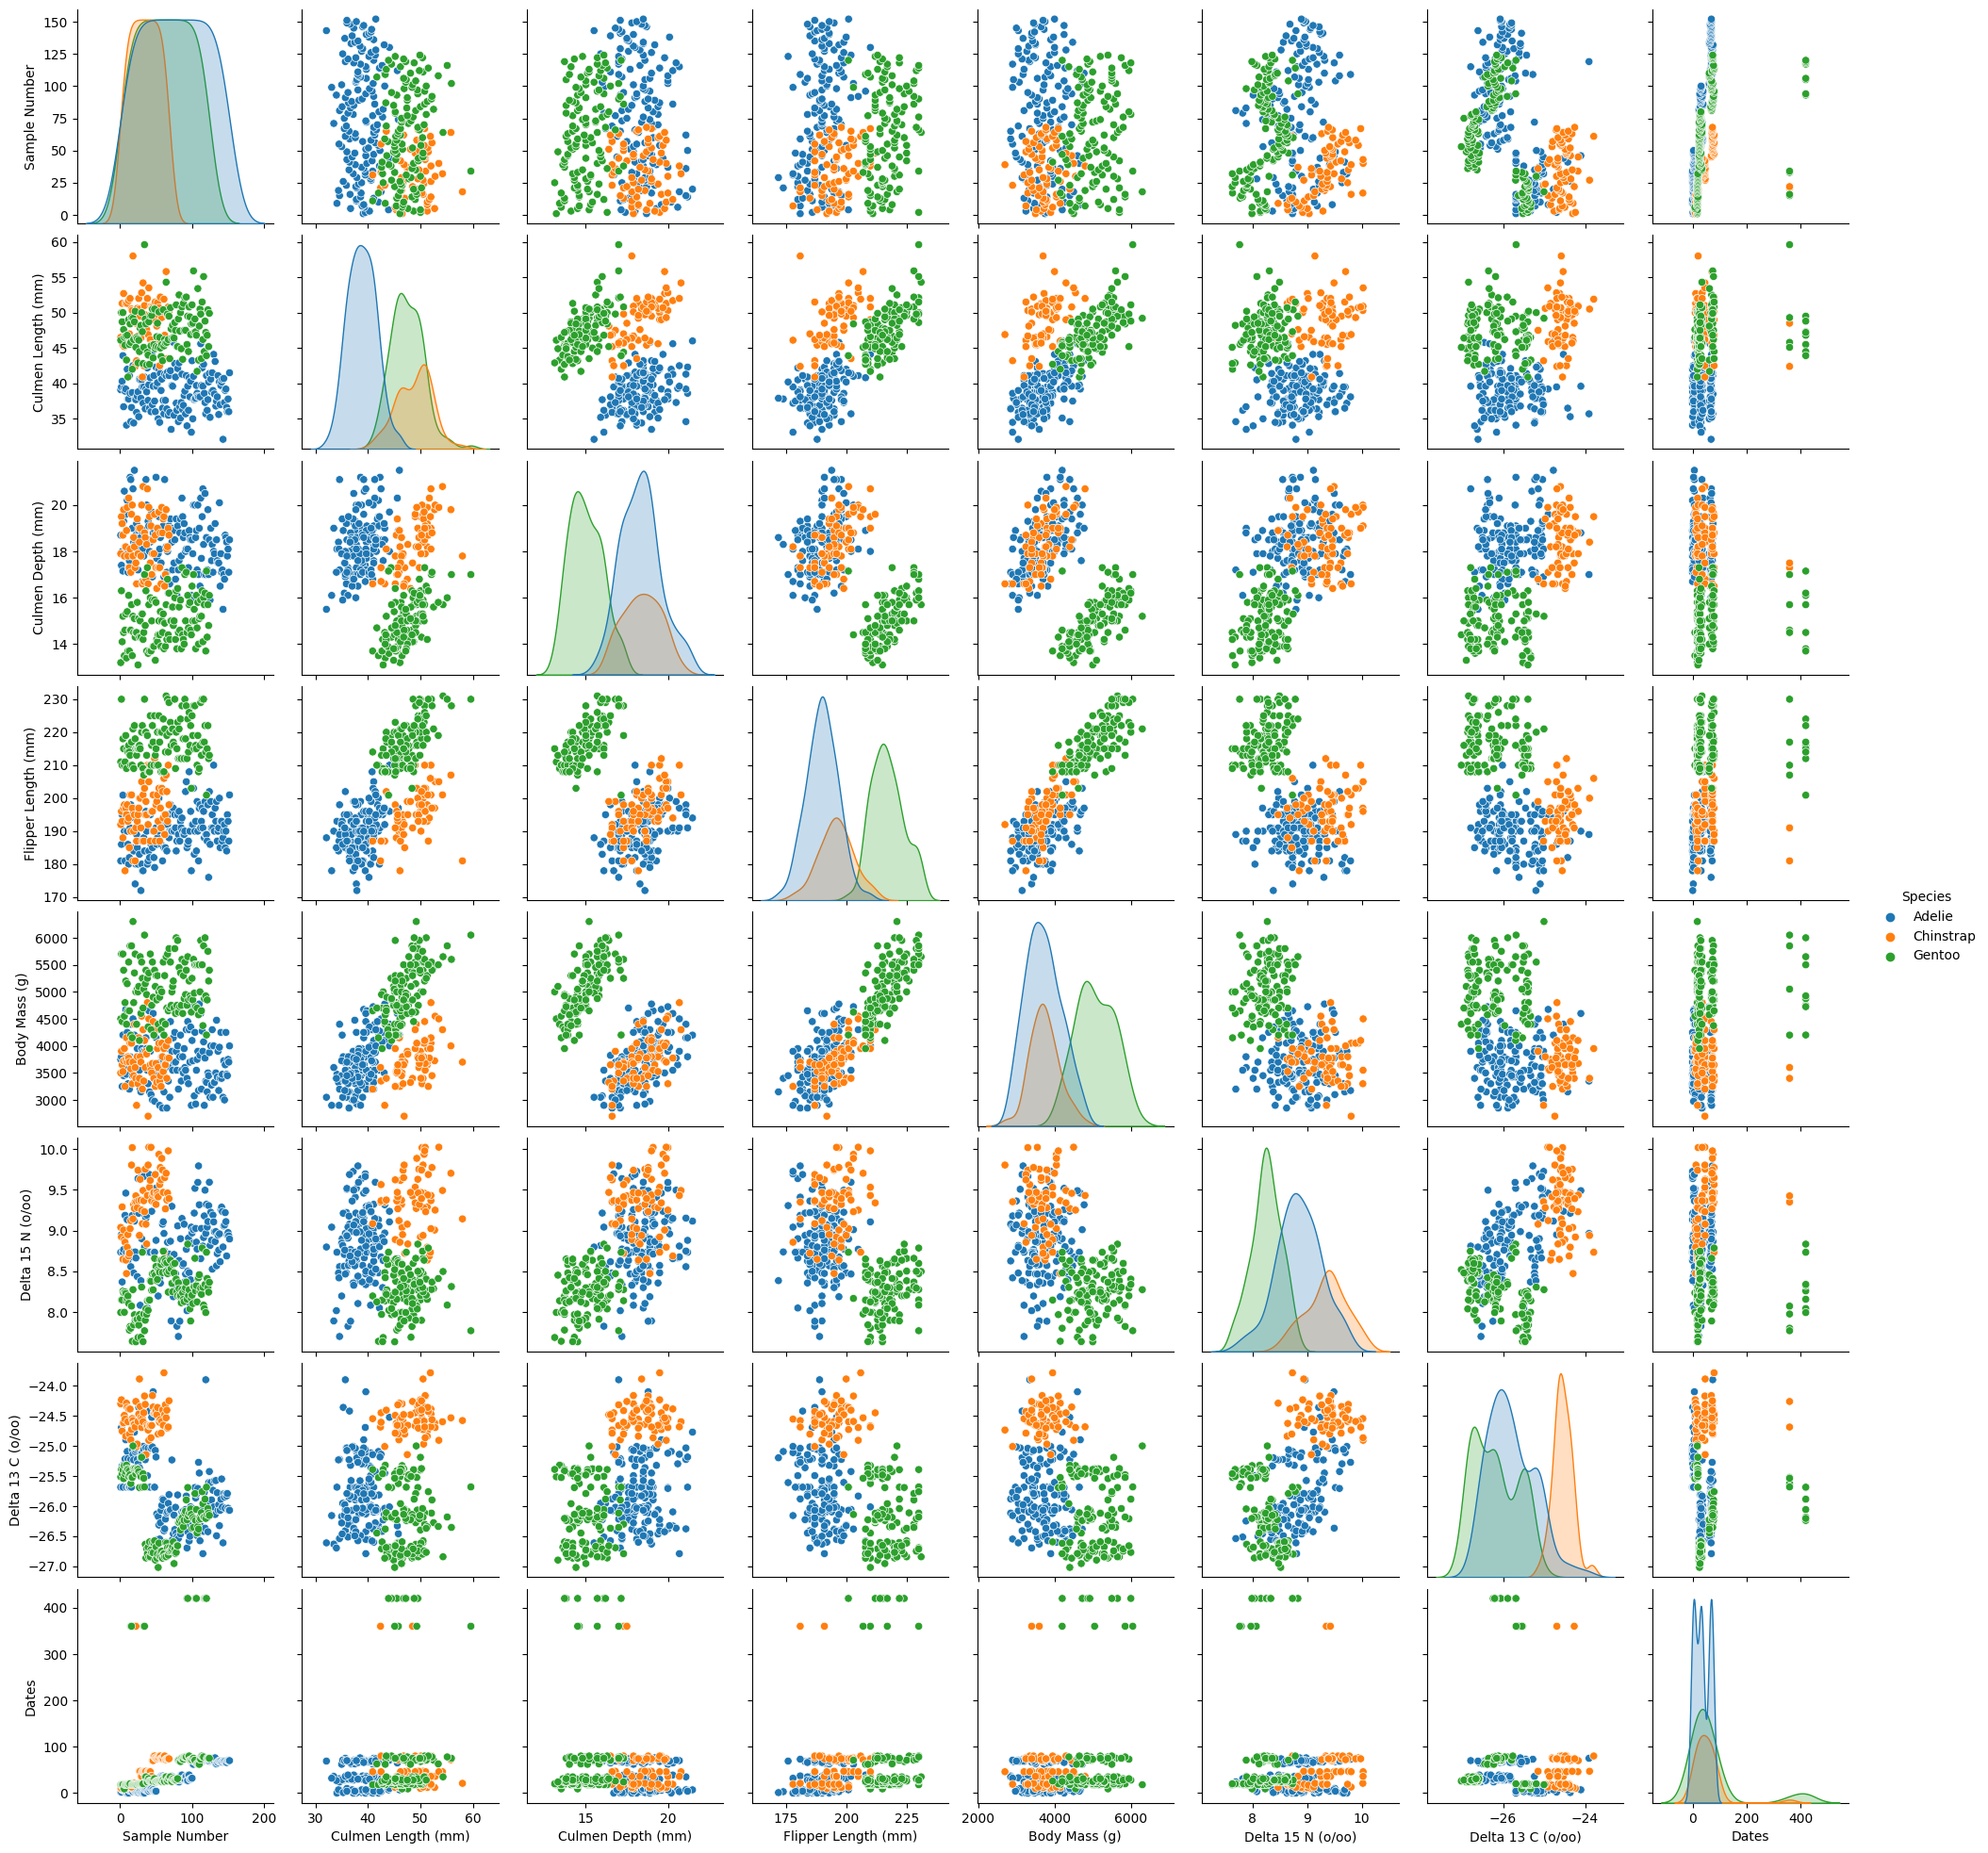

In [4]:
sns.pairplot(iter, hue = "Species")
plt.show()

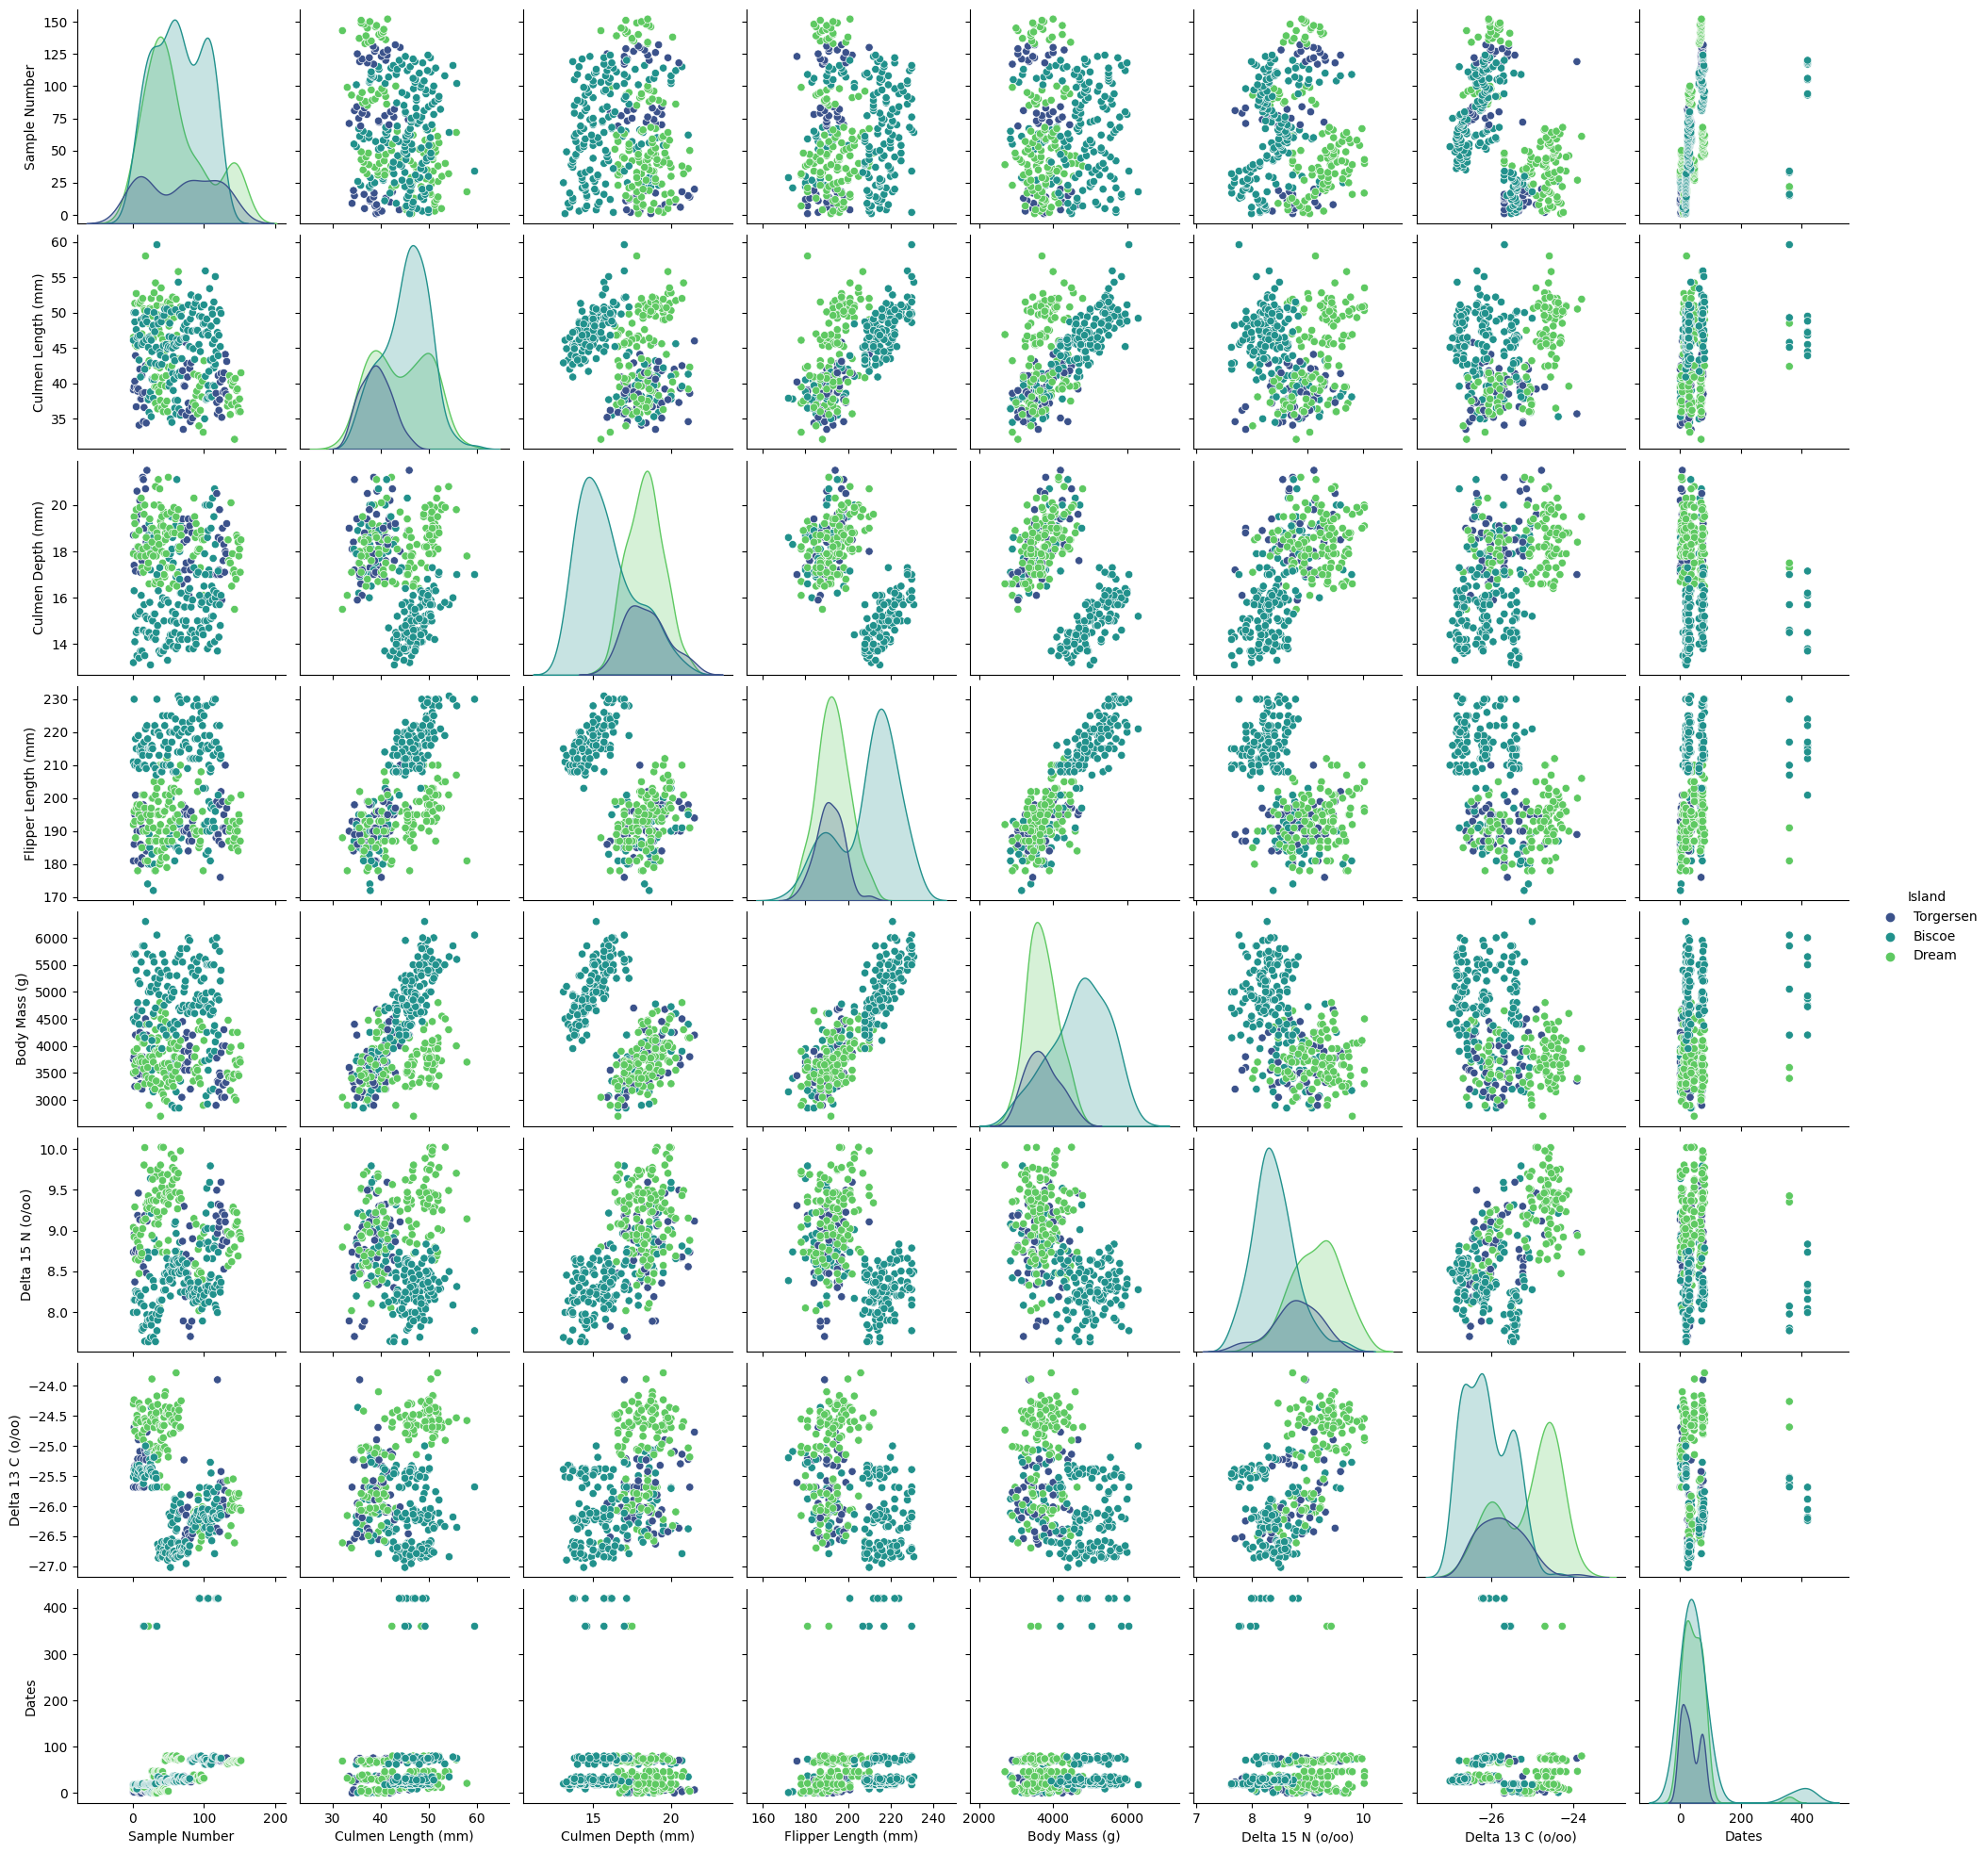

In [7]:
sns.pairplot(iter, hue = "Island", palette = "viridis")
plt.show()

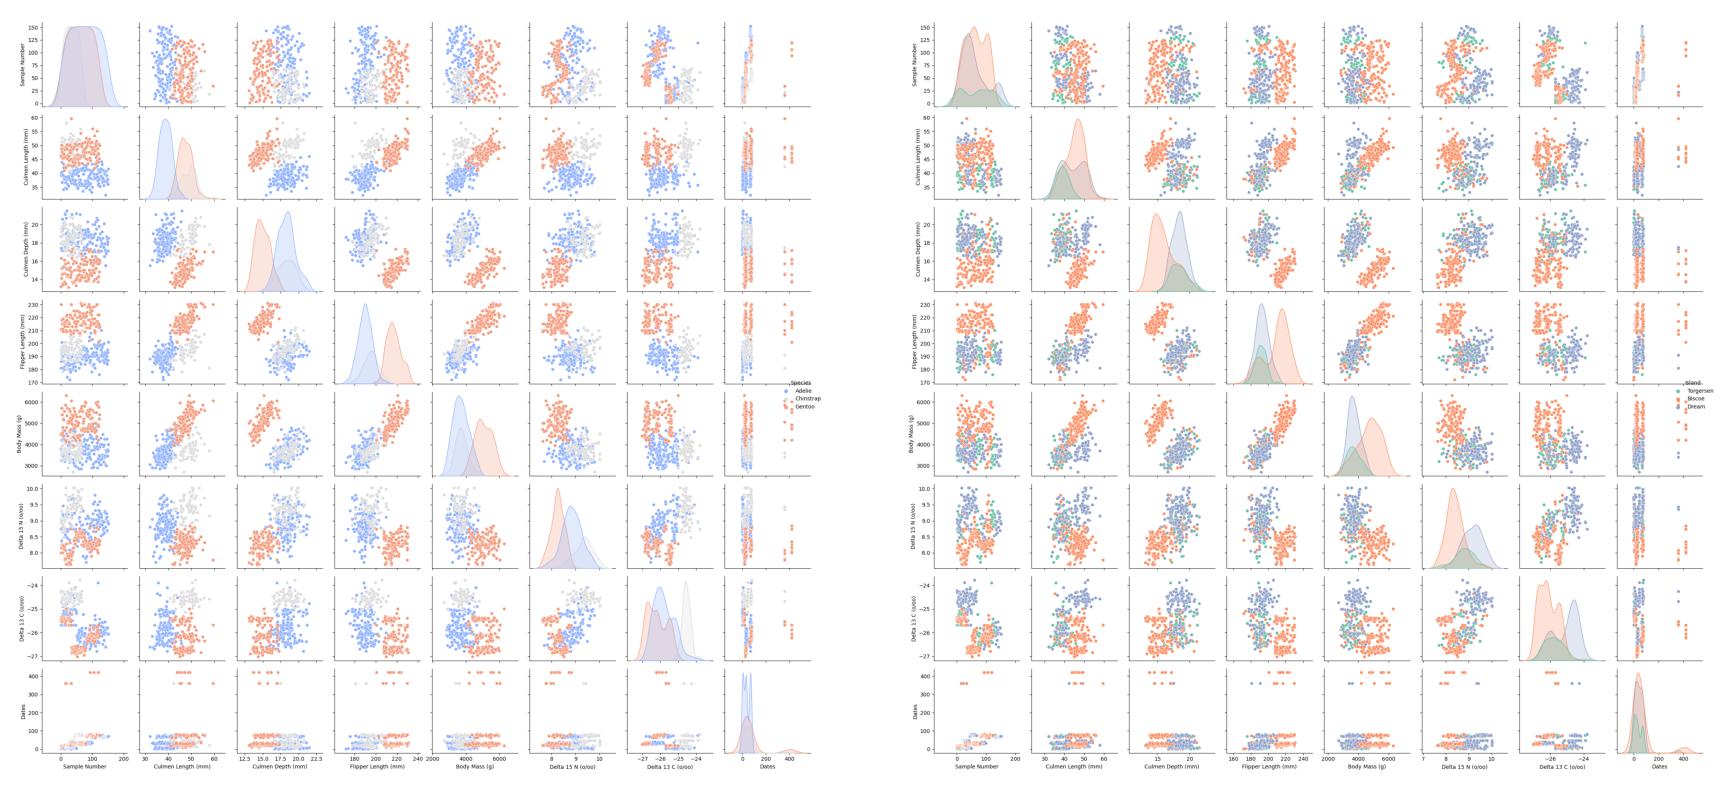

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Pairplot for Species
g1 = sns.pairplot(iter, hue="Species", palette="coolwarm")
g1.fig.suptitle("Pairplot by Species")  # Add title
plt.close(g1.fig)  # Close original figure to avoid duplication
axes[0].imshow(g1.fig.canvas.renderer.buffer_rgba())  # Render in subplot
axes[0].axis("off")  # Hide axes

# Pairplot for Island
g2 = sns.pairplot(iter, hue="Island", palette="Set2")
g2.fig.suptitle("Pairplot by Island")
plt.close(g2.fig)
axes[1].imshow(g2.fig.canvas.renderer.buffer_rgba())
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
iter["Date Egg"] = iter["Date Egg"].dt.strftime("%Y-%m-%d")


In [29]:
import json


result = iter.to_json(orient="columns")
parse = json.loads(result)
with open("penguins.json", "w") as f:
    json.dump(parse, f, indent=4)